# CONVOLUTIONAL NETWORKS

The dataset used is relatively small in size. Each example in the dataset has been resized to a (224,224) RGB image, associated with a label from 4 classes(apple,banana,orange and mixed). The dataset serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In this work, I will use the pre-trained model VGG16, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet,[here is the link to the paper](https://arxiv.org/pdf/1409.1556.pdf),.The model achieves 92.7% top-5 test accuracy in ImageNet.
The dataset used in this work shares the same image size and structure of training and testing splits. The model is trained for 10 epochs with batch size of 32, compiled with categorical_crossentropy loss function and rmsprop optimizer.
At the end I have also implemented a small CNN network as well consisting of 3 convolutional layers and 2 dense layers by increasing number of epoch cycles to 30.

IMPORTING LIBRARIES

In [75]:
from __future__ import print_function, division
from builtins import range, input
# keras libraries
import keras
from keras.layers import *
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# sklearn and matplotlibg for visualisation
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import cv2

### LOADING THE DATA 

In [76]:
train_path='/kaggle/input/fruit-images-for-object-detection/data/train'
val_path='/kaggle/input/fruit-images-for-object-detection/data/test'

Number of Images for Training:  240
Number of Images for validating:  60
Number of classes:  4


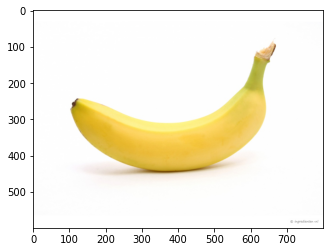

In [77]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(val_path + '/*/*.jp*g')
print("Number of Images for Training: ",len(image_files))
print("Number of Images for validating: ",len(glob(val_path + '/*/*.jp*g')))

# useful for getting number of classes
folders = glob(train_path + '/*')
print("Number of classes: ",len(folders))

# look at a random image 
plt.imshow(image.load_img(np.random.choice(image_files)))

plt.show()

### VGG16 MODEL 

In [78]:
# re-size all the images to 100x100
IMAGE_SIZE = [224, 224] 

# using the VGG16 model but not including the final output layer by using the command (include_top=False).
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# additional layers
x = Flatten()(vgg.output)
# we can add additional fully connected layers like this.
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

IMAGE DATAGENERATORS
For loading large size datasets directly from the directory we use datagenerators which load the data directly into the model.The main benefit of using this class to load the data is that images are loaded for a single dataset in batches, meaning that it can be used for loading both small datasets as well as very large image datasets with thousands or millions of images. The pattern for using the ImageDataGenerator class is used as follows: 1.Construct and configure an instance of the ImageDataGenerator class. 2.Retrieve an iterator by calling the flow_from_directory() function. 3.Use the iterator in the training or evaluation of a model.

In [79]:
# compliling the model.
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [80]:
# training config:
epochs = 10
batch_size = 32

# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  val_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [81]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/10


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


7/7 [==============================] - 67s 10s/step - loss: 99.3945 - accuracy: 0.3269 - val_loss: 4.2824 - val_accuracy: 0.8125
Epoch 2/10
7/7 [==============================] - 77s 11s/step - loss: 16.7643 - accuracy: 0.5433 - val_loss: 9.0332 - val_accuracy: 0.6429
Epoch 3/10
7/7 [==============================] - 68s 10s/step - loss: 4.2478 - accuracy: 0.8413 - val_loss: 3.6693 - val_accuracy: 0.8750
Epoch 4/10
7/7 [==============================] - 67s 10s/step - loss: 0.7126 - accuracy: 0.9519 - val_loss: 8.2222 - val_accuracy: 0.8214
Epoch 5/10
7/7 [==============================] - 71s 10s/step - loss: 1.6856 - accuracy: 0.9375 - val_loss: 1.2817 - val_accuracy: 0.9375
Epoch 6/10
7/7 [==============================] - 62s 9s/step - loss: 5.1841 - accuracy: 0.8333 - val_loss: 4.5450 - val_accuracy: 0.8929
Epoch 7/10
7/7 [==============================] - 70s 10s/step - loss: 0.5620 - accuracy: 0.9732 - val_loss: 0.6783 - val_accuracy: 0.9375
Epoch 8/10
7/7 [=====================

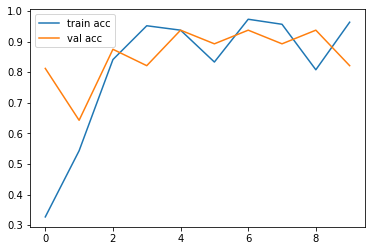

In [82]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

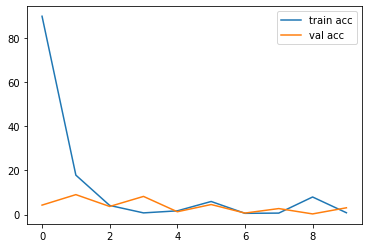

In [83]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### SIMPLE 3 LAYERED CNN 

In [122]:
import os 
import pandas as pd
import cv2
from PIL import Image
data=[]
labels=[]
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/banana")
for filename in filenames:
    labels.append(0)
    img=cv2.imread('/kaggle/input/fruit-images-for-object-detection/data/train/banana/'+filename)
    img = Image.fromarray(img, 'RGB')
    size_image = img.resize((224, 224))
    data.append(np.array(size_image))
    files.append(filename)

filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/mixed")
for filename in filenames:
    labels.append(1)
    img=cv2.imread('/kaggle/input/fruit-images-for-object-detection/data/train/mixed/'+filename)
    img = Image.fromarray(img, 'RGB')
    size_image = img.resize((224, 224))
    data.append(np.array(size_image))
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/apple")
for filename in filenames:
    labels.append(2)  
    img=cv2.imread('/kaggle/input/fruit-images-for-object-detection/data/train/apple/'+filename)
    img = Image.fromarray(img, 'RGB')
    size_image = img.resize((224, 224))
    data.append(np.array(size_image))
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/orange")
for filename in filenames:
    labels.append(3)
    img=cv2.imread('/kaggle/input/fruit-images-for-object-detection/data/train/orange/'+filename)
    img = Image.fromarray(img, 'RGB')
    size_image = img.resize((224, 224))
    data.append(np.array(size_image))
    files.append(filename)


In [123]:
data=np.array(data)
labels=np.array(labels)
data1=data

In [86]:
s=np.arange(data.shape[0])
np.random.shuffle(s)
data=data[s]
labels=labels[s]

In [87]:
num_classes=len(np.unique(labels))
len_data=len(data)
(x_train,x_test)=data[(int)(0.1*len_data):],data[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [88]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [89]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [90]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=IMAGE_SIZE + [3]))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 86528)            

In [91]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [92]:
model1.fit(x_train,y_train,batch_size=20,epochs=20,verbose=1)

Epoch 1/20
216/216 [==============================] - 12s 56ms/step - loss: 5.6683 - accuracy: 0.3750
Epoch 2/20
216/216 [==============================] - 13s 60ms/step - loss: 1.2891 - accuracy: 0.4167
Epoch 3/20
216/216 [==============================] - 31s 143ms/step - loss: 1.0187 - accuracy: 0.6528
Epoch 4/20
216/216 [==============================] - 13s 60ms/step - loss: 0.7672 - accuracy: 0.7315
Epoch 5/20
216/216 [==============================] - 13s 59ms/step - loss: 0.7875 - accuracy: 0.7269
Epoch 6/20
216/216 [==============================] - 12s 55ms/step - loss: 0.5702 - accuracy: 0.7963
Epoch 7/20
216/216 [==============================] - 12s 56ms/step - loss: 0.5501 - accuracy: 0.8194
Epoch 8/20
216/216 [==============================] - 12s 56ms/step - loss: 0.3231 - accuracy: 0.8935
Epoch 9/20
216/216 [==============================] - 12s 56ms/step - loss: 0.4031 - accuracy: 0.8565
Epoch 10/20
216/216 [==============================] - 12s 58ms/step - loss: 0.33

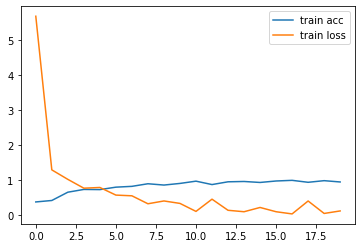

In [93]:
# accuracies
plt.plot(model1.history.history['accuracy'], label='train acc')
plt.plot(model1.history.history['loss'], label='train loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### ANALYSING THE RESULTS FROM THE MODELS 

In [94]:
out=model.predict(train_generator)
out1=model1.predict(train_generator)

/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [95]:
out

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01755948e-14, 9.64479148e-16, 0.00000000e+00],
       [1.00000000e+00, 3.16282160e-34, 1.46228421e-33, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.07278277e-10, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 7.19331881e-37, 2.68476929e-30],
       [1.00000000e+00, 2.94419220e-37, 1.87800443e-25, 0.00000000e+00],
       [1.00000000e+00, 4.46361560e-25, 1.08907257e-24, 0.00000000e+00],
       [6.50574267e-02, 1.28238597e-07, 9.34942424e-01, 6.99727665e-10],
       [1.00000000e+00, 5.81389813e-28, 8.26390671e-21, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.73299484e-31, 0.00000000e+00],
       [3.82889062e-21, 9.99228835e-01, 3.71288246e-04, 3.99929791e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e

In [96]:
out1

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e

In [97]:
rows=240
columns=4
y_predicted1=[]
for i in range(rows):
    max=-1
    for j in range(columns):
        if(max<out1[i][j]):
            max=out1[i][j]
            max1=j
    y_predicted1.append(max1)

In [124]:
data1=data1.astype('float32')/255

In [125]:
y_predicted1=model1.predict_classes(data1)

In [126]:
y_predicted1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [99]:
rows=240
columns=4
y_predicted=[]
for i in range(rows):
    max=-1
    for j in range(columns):
        if(max<out[i][j]):
            max=out[i][j]
            max1=j
    y_predicted.append(max1)

In [129]:
y_predicted1=np.asarray(y_predicted)
y_predicted1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [101]:
import os
import pandas as pd
files=[]
categories = []
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/banana")
for filename in filenames:
    categories.append(0)
    files.append(filename)

filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/mixed")
for filename in filenames:
    categories.append(1)
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/apple")
for filename in filenames:
    categories.append(2)    
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/orange")
for filename in filenames:
    categories.append(3)
    files.append(filename)


df = pd.DataFrame({
    'filename': files,
    'category': categories
})

## CLASSIFICATION REPORT
The classification report visualizer displays the precision, recall, F1, and support scores for the model. 
The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. 

In [104]:
# from the VGG16 model
report = classification_report(df['category'], y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        73
           1       0.24      0.90      0.38        20
           2       0.70      0.28      0.40        75
           3       1.00      0.94      0.97        72

    accuracy                           0.72       240
   macro avg       0.73      0.76      0.67       240
weighted avg       0.83      0.72      0.73       240



In [127]:
# from the simple model.
report = classification_report(df['category'], y_predicted1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      0.75      0.86        20
           2       0.93      1.00      0.96        75
           3       0.99      0.97      0.98        72

    accuracy                           0.97       240
   macro avg       0.98      0.93      0.95       240
weighted avg       0.97      0.97      0.97       240



We can clearly see from the classification report that VGG16 model performed better as compared to a comparatively less dense CNN on the initial epochs but as the number of epochs increased the performance was more or less balanced. So adding layers does help improve the performance but after the saturation point it also deteoriates the model's accuracy very steeply.